In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Rejet



### Densité bornée sur un intervalle borné


Considérons par exemple la densité d'une loi ... (à une constante près):

In [ ]:
def f(x):
    return x**0.5*(1-x)**2

x=np.linspace(0,1,100)
plt.plot(x,f(x));

Cette fonction est définie sur $[0,1]$ et à valeurs dans $[0,0.3]$. Lançons successivement des points aléatoires $(U_i,V_i)$ uniformément dans le rectangle $[0,1]\times [0,0.3]$. Arrêtons les lancés  dès qu'un point  tombe en-dessous de la courbe. Clairement, on n'a plus de chance de s'arrêter là ou la courbe est haute. Notons $(U_I,V_I)$ le point où l'on s'est arrêté.

***A vous:*** Décrivez $(3\heartsuit)$ intuitivement la loi de $U_I$.

Si vous n'avez pas la réponse immédiatement, peut-être pourriez-vous simplement comparer les probabilités:
$$
\mathbf P[0<U_I<0.2] \qquad \text{et} \qquad \mathbf P[0.8<U_I<1]
$$
 Et plus généralement, vous pourriez dire que la probabilité $\mathbf P[a<U_I<b]$ est proportionnelle à... Donc la loi de $U_I$ est...

#### ♡♡



In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,5)

def rejet():
    while True:
        U=np.random.uniform(0,1)
        V=np.random.uniform(0,0.3)
        if V<f(U):
            ax[0].plot(U,V,".",c="g")
            return U
        else:
            ax[0].plot(U,V,".",c="r")


simus=[]
for i in range(400):
    simus.append(rejet())
ax[0].plot(x,f(x));
ax[1].hist(simus,edgecolor="k")
ax[0].set_title("tous les points")
ax[1].set_title("histogramme des simulations");

Voici la preuve formelle du résultat que vous avez intuité précédemment. Comprenez-là, elle est très instructive.


Considérons $f$ une fonction positive, portée par $[A,B]$ et majorée par $M$. Imaginons que $f$ est proportionnelle à une densité qui nous intéresse. Considérons $(U_i,V_i)$ des v.a i.i.d uniformes sur $[A,B]\times[0,M]$, notons $I = \min\{i: V_i \leq f(U_i) \}$. Calculons la loi de $U_I$. Considérons pour cela $\phi$ une fonction test. Dans le calcul suivant, on notera $cst$ une quantité qui ne dépend pas de $\phi$:



\begin{align}
\mathbf E & [\phi(U_I)] \\
&= \sum_i \mathbf E[\phi(U_i), i=I] \\
&=\sum_i \mathbf E[\phi(U_i), V_i\leq f(U_i), V_{i-1}>f(U_{i-1})\dots V_0>f(U_0)] \\
&=\sum_i \mathbf E[\phi(U_i), V_i\leq f(U_i)] \mathbf E[V_{i-1}>f(U_{i-1})\dots V_0>f(U_0)] \\
&=\mathbf E[\phi(U_0), V_0\leq f(U_0)] \sum_i \mathbf E[V_{i-1}>f(U_{i-1})\dots V_0>f(U_0)] \\
&= cst \ \mathbf E[\phi(U_0), V_0\leq f(U_0)]\\
&= cst \ \int_A^B \int_0^M \phi(u) 1_{\{v \leq f(u)\}} \,  dv \, du  \\
&= cst \ \int  \phi(u) f(u) \, du  
\end{align}
En particulier avec $\phi=1$ on découvre que $1 = cst \int f$
et par conséquence:
$$
\mathbf E[\phi(U_I)]  = \int  \phi(u) \frac{\ f(u) \ }{\int f} \, du
$$
Conclusion: $U_I$ a comme densité $\frac{\ f(u) \ }{\int f}$.



Remarques:

* Pour utiliser cette méthode de rejet, on n'a besoin de connaitre la densité qu'à une constante multiplicative près (et cela a son utilité dans certaines applications en grande dimension). D'ailleurs on voit dans la preuve que $f$ est naturellement renormalisée.
* Retenez l'astuce de la constante (on peut s'en passer mais les calculs sont vraiment plus long).
* Retenez la manière dont on a réussi à remplacer $I = \min\{i: V_i \leq f(U_i) \}$ par une expression toute simple.
* Pourquoi $(1\heartsuit)$ faut-il trouver un 'bon' majorant $M$?

### Vectorisation du rejet

On peut assez facilement vectoriser les techniques de rejets.



In [ ]:
def rejet_np(nb):
    U=np.random.uniform(0,1,size=nb)
    V=np.random.uniform(0,0.3,size=nb)
    return U[V<f(U)]

simus=rejet_np(1000)
plt.hist(simus,edgecolor="k");

L'inconvénient c'est
...


## Vectorisation du rejet


***A vous:*** Trouvez $(2\heartsuit)$ une astuce pour faire une fonction qui renvoie un nombre de simulations donné, et qui utilise la vectorisation.

#### ♡♡♡



Aide pour agrandir un vecteur:

In [ ]:
A=np.ones([3])
A=np.append(A,np.zeros([2]))
A

Attention, pour les listes le `append` c'est uniquement pour ajouter 1 élément, sinon il faut utiliser `extend`

In [ ]:
A=[1,1,1]
A.append(2)
A.extend([0,0])
A

In [ ]:
"""
On peut tirer profit de la vectorisation tout en garantissant un nombre donné `n`
de simulations renvoyées en effectuant les simulations par paquets,
jusqu'à obtenir le nombre de simulations souhaité.
"""
def rejet_np_paquet(n):
    R = np.array([])
    while len(R) < n:
        ...


### Densité perturbée


Supposons que l'on veuille simuler des v.a dont la densité est proportionnelle à:
$$
 f(x)= e^{-x} \, \big(1-\cos(8 x) \big) 1_{\mathbb R_+}
$$
Cette densité n'est pas à support compact, on ne peut donc pas utiliser la technique précédente. Mais on remarque que  $f(x)$ peut être vu comme une perturbation de la loi exponentielle: une loi que je sais facilement simuler!

* Observez le programme suivant et déduisez la technique.

* Cette technique peut-elle être employée pour des densités non bornées? Si oui, inventez un exemple $(4\heartsuit)$.

In [ ]:
""" on décompose f en un produit de deux termes. """
""" g est proportionnelle à la loi exponentielle """
def g(x):
    return 2*np.exp(-x)
""" h est à valeur dans [0,1], c'est une perturbation"""
def h(x):
    return (1-np.cos(8*x))/2

def f(x):
    return g(x)*h(x)

x=np.linspace(0,7,1000)
plt.plot(x,g(x))
plt.plot(x,f(x));

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(12,5)

def rejet2():
    while True:
        U=-np.log(np.random.random())
        V=np.random.uniform(0,g(U))
        if V<f(U):
            ax[0].plot(U,V,".",c="g")
            return U
        else:
            ax[0].plot(U,V,".",c="r")


simus=[]
for i in range(600):
    simus.append(rejet2())
ax[0].plot(x,g(x))
ax[0].plot(x,g(x)*h(x));
ax[1].hist(simus,bins=30,edgecolor="k")
ax[0].set_title("tous les points")
ax[1].set_title("histogramme des simulations");

#### ♡♡♡

Écrivez  la preuve qui justifie cette technique (en vous inspirant d'une preuve précédente).




### Rejet géométrique

On veut maintenant simuler des v.a uniformes dans un domaine de $\mathbb R^2$ un peu tordu (une sorte d'oeil, c.f plus bas).  On utilise aussi la technique du rejet, mais avec une densité qui prend comme valeur 0 ou 1.   


In [ ]:
""" renvoie True si (x,y) est dans le domaine."""
def in_domain(x,y):
    if 0<x<np.sqrt(y) and x>y**2 and 0<y<1 and (x-0.5)**2+(y-0.5)**2>0.02:
        return True
    else:
        return False


fig,ax=plt.subplots(1,2,figsize=(12,5))

def rejet3():
    while True:
        X=np.random.uniform(0,1)
        Y=np.random.uniform(0,1)
        if in_domain(X,Y):
            ax[0].plot(X,Y,".",c="g")
            return X,Y
        else:
            ax[0].plot(X,Y,".",c="r")




Xs=[]
Ys=[]
for i in range(600):
    X,Y=rejet3()
    Xs.append(X)
    Ys.append(Y)

ax[1].hist2d(Xs,Ys,bins=[30,30])
ax[0].set_title("points acceptés et rejetés")
ax[1].set_title("histo des points acceptés");


***A vous:***

* Calculez  approximativement l'aire de cet oeil.
* Calculez approximativement le barycentre de cet oeil. Pas desoin de faire de long calcul, utiliser les simulations pour cela.

### ♡♡♡



In [ ]:
def rejet3():
    I = 0
    while True:
        ...

Xs=[]
Ys=[]
Is=[]
for i in range(10_000):
    X,Y,I=rejet3()
    Xs.append(X)
    Ys.append(Y)
    Is.append(I)

print("Aire du domaine :", 1 / np.mean(Is))
print("Barycentre      :", (np.mean(Xs), np.mean(Ys)))

In [ ]:
#--- To keep following outputs, do not run this cell! ---

Aire du domaine : 0.2732987154960372
Barycentre      : (0.43940396723489356, 0.43918372244397885)


### Une densité non constante dans le plan

Simulez des v.a sur $\mathbb R^2$ dont la densité est proportionnelle à:
$$
  f(x,y) =  1_{\{x^2+y^2<1\}} (1+\sin(x*y))
$$

#### ♡♡♡


Cette fonction $f$ a son support inclus dans le carré $[-1,1]\times[-1,1]$ et est majorée par $2$. Comme pour la méthode du rejet en dimension 1, on tire donc des points $(X_i, Y_i, Z_i)$ uniformément dans le cube $[-1,1]\times[-1,1]\times[0,2]$, jusqu'à ce qu'on ait $Z_i \leqslant f(X_i, Y_i)$.
Le couple $(X_I, Y_I)$ ainsi obtenu suit une loi de densité proportionnelle à $f$.

In [18]:
def f(x,y):
    if x**2 + y**2 > 1:
        return 0
    else:
        return 1 + np.sin(x*y)


def rejet4():
    while True:
        ...

Xs=[]
Ys=[]
for i in range(100000):
    X,Y = rejet4()
    Xs.append(X)
    Ys.append(Y)

plt.title("Histogramme des simulations")
plt.hist2d(Xs,Ys,bins=[25,25]);

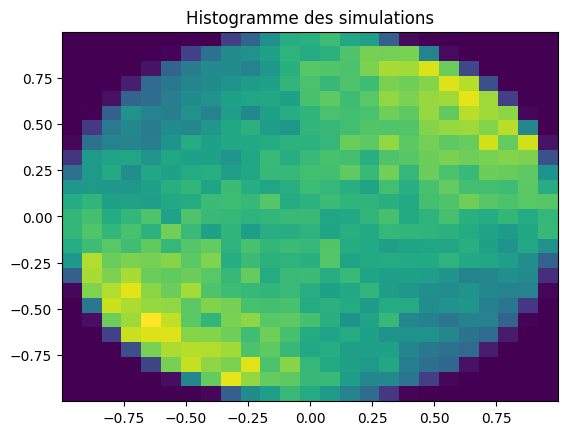

In [18]:
#--- To keep following outputs, do not run this cell! ---

### Dessinons la densité

In [17]:
n=40
xy=np.linspace(-1,1,n)
XX,YY=np.meshgrid(xy,xy)

F=np.zeros([n,n])
for i in range(n):
    for j in range(n):
        F[i,j]=f(XX[i,j],YY[i,j])

Avec `imshow`

In [14]:
fig,ax=plt.subplots()
ax.imshow(


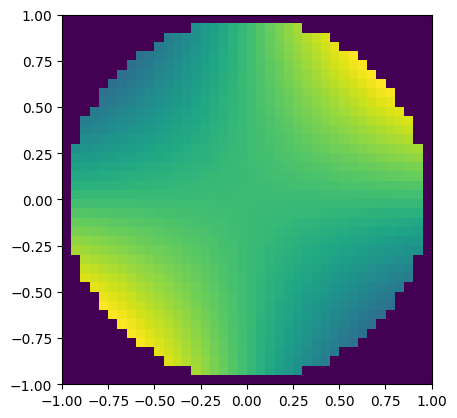

In [14]:
#--- To keep following outputs, do not run this cell! ---

Avec `pcolormesh`

In [19]:
fig,ax=plt.subplots()
ax.pcolormesh(
ax.set_aspect("equal")

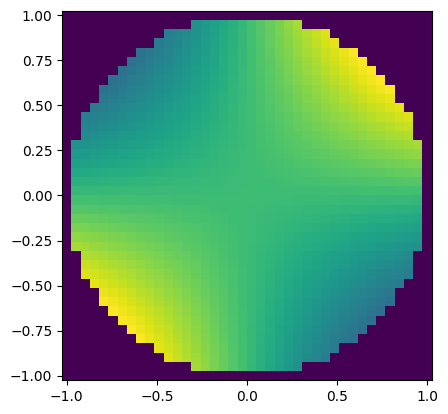

In [19]:
#--- To keep following outputs, do not run this cell! ---

### Et en vectorisant la fonction

In [20]:
def f_vecto(x,y):
    return np.where(x**2 + y**2 > 1,0,1 + np.sin(x*y))


In [21]:
F=f_vecto(XX,YY)
F.shape

In [22]:
fig,ax=plt.subplots()
ax.pcolormesh(
ax.set_aspect("equal")

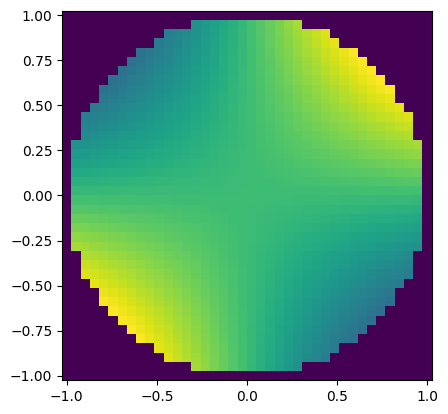

In [22]:
#--- To keep following outputs, do not run this cell! ---